In [1]:
# Librerias
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [66]:
nodos = pd.read_csv('nodos.csv', sep=',', index_col="Id")
arcos = pd.read_csv('arcos.csv', sep=',', index_col="Id")

FileNotFoundError: [Errno 2] No such file or directory: 'nodos.csv'

In [5]:
# Construir red
G=nx.DiGraph()
# Nodos
# Agregar los nodos por su identificador
G.add_nodes_from(nodos.index)
# Agregar los atributos de los nodos
# Primero recorrer los nodos que se agregaron a la red
for nodo in G.nodes:
    # En cada nodo recorremos los atributos de los nodos
    for atr in nodos:
        # Agregar cada atributo al nodo
        G.nodes[nodo][atr]=nodos[atr][nodo]
        
# Arcos
# Agregar los arcos
G.add_edges_from([tuple(x) for x in arcos[['SOURCE','TARGET']].to_numpy()])

## Nota: para este ejercicio no requerimos los pesos dado que los pesos son siempre uno (1)

In [6]:
G.number_of_nodes()

2719

In [7]:
G.number_of_edges()

5076

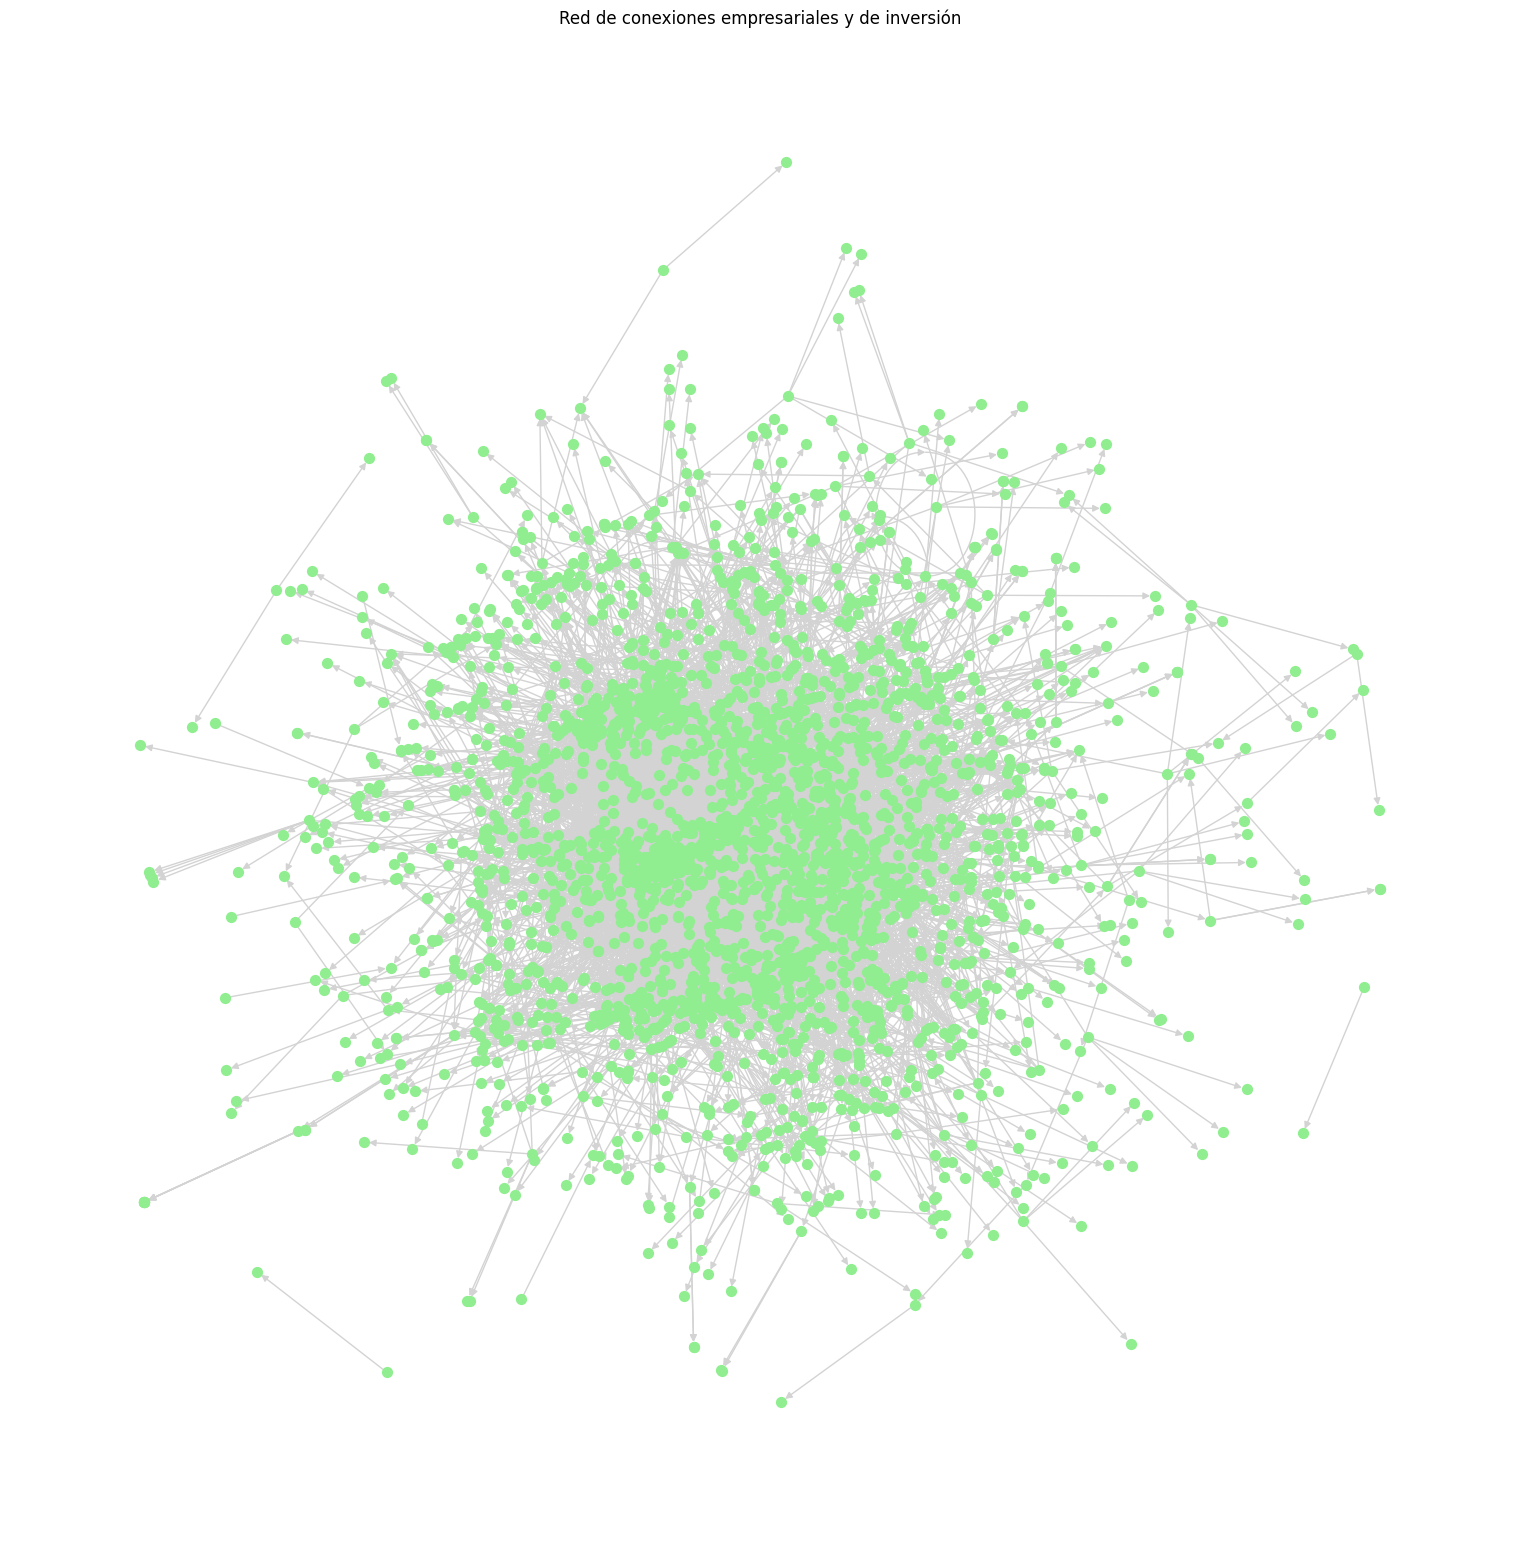

In [9]:
# Lienzo de la gráfica
fig=plt.figure(figsize=(15,15))

# Después se genera el gráfico
nx.draw_kamada_kawai(G, node_size=50, node_color='lightgreen', edge_color='lightgray')

plt.title('Red de conexiones empresariales y de inversión')
# Por último se muestra la gráfica
plt.show()

# Actores relevantes de la red
haciendo uso de las herramientas dadas en el curso hasta el momento.

Se crea el diccionario `actores_relevantes` para almacenar la información relevante de la red a través de sus estadísticas

In [10]:
actores_relevantes = {}
actores_relevantes["grados"] = G.degree()
actores_relevantes["Nodos más conectados"] = {ele[0]:ele[1] for ele in sorted(dict(actores_relevantes["grados"]).items(), key=lambda x: x[1], reverse=True)[:20]}
actores_relevantes["Nodos más conectados"]

In [65]:
actores_relevantes["nodos con mas arcos que salen"] = {ele[0]:ele[1] for ele in sorted(dict(G.out_degree()).items(), key=lambda x: x[1], reverse=True)[:20]}
actores_relevantes["nodos con mas arcos que salen"]

actores_relevantes["nodos con mas arcos que reciben"] = {ele[0]:ele[1] for ele in sorted(dict(G.in_degree()).items(), key=lambda x: x[1], reverse=True)[:20]}
actores_relevantes["nodos con mas arcos que reciben"]


{245: 104,
 1199: 83,
 431: 72,
 2369: 72,
 73: 67,
 2313: 67,
 573: 47,
 2682: 45,
 367: 44,
 370: 38,
 1960: 35,
 2217: 35,
 910: 33,
 235: 32,
 1067: 31,
 1817: 31,
 1848: 31,
 2133: 30,
 1921: 28,
 981: 27}

In [17]:
actores_relevantes["PageRank"] = nx.pagerank(G)

actores_relevantes["Nodos más PageRank"] = {ele[0]:ele[1] for ele in sorted(actores_relevantes["PageRank"].items(), key=lambda x: x[1], reverse=True)[:20]}
actores_relevantes["Nodos más PageRank"]

{245: 0.005921415354722702,
 2369: 0.005054091792592117,
 1199: 0.004648623237824947,
 431: 0.003889501420903966,
 2313: 0.0036148241242218676,
 73: 0.0033699476167495528,
 2682: 0.002901065638460617,
 367: 0.0027341741740012746,
 1960: 0.0026103469024007604,
 573: 0.0025907660789799237,
 2217: 0.002296375536342345,
 1461: 0.0021900969595458927,
 1651: 0.001972435134434523,
 370: 0.0019528091050537832,
 1067: 0.0019440676783720068,
 1817: 0.0019390283059486605,
 538: 0.0019318540080467228,
 1655: 0.0018463872227293444,
 1107: 0.0018438212116120966,
 235: 0.0017652931879775066}

In [18]:
actores_relevantes["Densidad"] = np.round(nx.density(G),4)
actores_relevantes["Densidad"]


0.0007

In [40]:
G_no_dirigida = G.to_undirected()
actores_relevantes["componentes_de_la_red"] = {i:j for i, j  in enumerate(reversed(sorted(list(nx.connected_components(G_no_dirigida)), key=len)))}
actores_relevantes["componentes_de_la_red"]
actores_relevantes["num_nodos_componentes"] = {ele:len(actores_relevantes["componentes_de_la_red"][ele]) for ele in actores_relevantes["componentes_de_la_red"].keys()}
actores_relevantes["num_nodos_componentes"]

{0: 2674, 1: 11, 2: 6, 3: 6, 4: 6, 5: 4, 6: 3, 7: 3, 8: 2, 9: 2, 10: 2}

In [43]:
# Centralidad
actores_relevantes["centralidad_eigen_vector"] = nx.eigenvector_centrality(G)
actores_relevantes["nodos_mas_centrales_eigen_vector"] = {ele[0]:ele[1] for ele in sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True)[:20]}
actores_relevantes["nodos_mas_centrales_eigen_vector"]


{1199: 0.24173402591784246,
 1067: 0.23276684773319953,
 431: 0.23276670305726474,
 20: 0.2327663782868057,
 1638: 0.2327662174023638,
 367: 0.21934060829659616,
 230: 0.2148697757330064,
 1258: 0.19695528872569704,
 1611: 0.19695048893981218,
 1830: 0.19695048893981218,
 1966: 0.19695048893981218,
 734: 0.19692468946535277,
 866: 0.19692468946535277,
 1020: 0.19692468946535277,
 1115: 0.19692468946535277,
 1506: 0.19692468946535277,
 2118: 0.17457462733302512,
 562: 0.17457421104786683,
 2218: 0.16114546376165936,
 1394: 0.16114291002130182}

In [44]:
# Intermediacion
actores_relevantes["intermediacion"] = nx.betweenness_centrality(G)
actores_relevantes["nodos_con_mas_intermediacion"] = {ele[0]:ele[1] for ele in sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:20]}
actores_relevantes["nodos_con_mas_intermediacion"]



{409: 8.145102254548055e-05,
 2217: 6.357648393200851e-05,
 2682: 4.9899753629276116e-05,
 2332: 4.4550933362365924e-05,
 2118: 4.3467627991852465e-05,
 1258: 4.224890945002482e-05,
 1564: 3.608761015522954e-05,
 1758: 3.1889801844489894e-05,
 831: 3.0332550374376797e-05,
 1603: 2.8120801909578486e-05,
 1611: 2.7082634262836428e-05,
 1817: 2.234317326684005e-05,
 538: 2.220776009552587e-05,
 196: 2.1395281067640778e-05,
 1262: 1.963490984055641e-05,
 708: 1.6791233242958583e-05,
 1685: 1.4760035673245852e-05,
 2712: 1.4398933883074701e-05,
 268: 1.4150676402332033e-05,
 1403: 1.3202784203132758e-05}

In [45]:
# Closeness - cercanía
actores_relevantes["cercania-closeness"] = nx.closeness_centrality(G)
actores_relevantes["nodos_con_mas_cercania"] = {ele[0]:ele[1] for ele in sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:20]}
actores_relevantes["nodos_con_mas_cercania"]



{245: 0.04216921153606229,
 1199: 0.035573112324593675,
 2369: 0.03193949600882108,
 431: 0.02656364974245769,
 2313: 0.024710371853449015,
 73: 0.023801437708722475,
 573: 0.02048841059602649,
 1651: 0.019803975674154872,
 2682: 0.01964988114913568,
 367: 0.018597265791410095,
 2217: 0.018161563094782972,
 1107: 0.015131666244466158,
 280: 0.014887607111490895,
 1067: 0.014569536423841059,
 230: 0.014354475319177988,
 370: 0.014327559857361184,
 1817: 0.01390728476821192,
 1960: 0.013902028802691056,
 1350: 0.013459440257796045,
 1218: 0.013064213547905884}

In [47]:
actores_relevantes["clustering_dirigido"] = nx.clustering(G)
actores_relevantes["nodos_con_mas_clustering_dirigido"] = {ele[0]:ele[1] for ele in sorted(nx.clustering(G).items(), key=lambda x: x[1], reverse=True)[:20]}
actores_relevantes["nodos_con_mas_clustering_dirigido"]

actores_relevantes["clustering_no_dirigido"] = nx.clustering(G_no_dirigida)
actores_relevantes["nodos_con_mas_clustering_no_dirigido"] = {ele[0]:ele[1] for ele in sorted(nx.clustering(G_no_dirigida).items(), key=lambda x: x[1], reverse=True)[:20]}
actores_relevantes["nodos_con_mas_clustering_no_dirigido"]


{860: 1.0,
 2324: 1.0,
 2697: 1.0,
 614: 0.3333333333333333,
 674: 0.3333333333333333,
 1350: 0.3333333333333333,
 2105: 0.3333333333333333,
 2383: 0.3333333333333333,
 2475: 0.3333333333333333,
 966: 0.3,
 1816: 0.3,
 183: 0.2,
 445: 0.2,
 552: 0.2,
 711: 0.2,
 731: 0.2,
 909: 0.2,
 1505: 0.2,
 1625: 0.2,
 1676: 0.2}

False

In [61]:
# path = dict(nx.all_pairs_shortest_path(G))
# path = dict(nx.all_pairs_shortest_path(G_no_dirigida))
# mayor_distancia=0
# for i in G_no_dirigida.nodes():
#     for j in G_no_dirigida.nodes():
#         if i != j:
#             if len(path[i][j]) > mayor_distancia:
#                 mayor_distancia=len(path[i][j])-1


# print('El diametro de la red es', mayor_distancia)

nx.is_strongly_connected(G) 

nx.reciprocity(G) # Reciprocidad de la red
nx.degree_assortativity_coefficient(G) # asortatividad
nx.density(G) # Qué proporción de de conexiones entre los nodos existen

#nx.is_strongly_connected(G)
#nx.is_connected(G_no_dirigida)
#nx.diameter(G) # Solo funciona en las componentes


0.000686851661961814

# Análisis visual de la red
deberán identificar los actores relevantes de la red haciendo uso de las herramientas dadas en el curso hasta el momento

Se puede hacer un subgraph de cada red
